In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

In [34]:
client = '4ca94e3259af4f8c9bbffc783a8db3b7'
secret = '9c7476b0253f49aeb17ef953e927d433'
username = 'tiff_chung'
redirect_uri = 'https://developer.spotify.com/dashboard/applications/4ca94e3259af4f8c9bbffc783a8db3b7'
scope = 'user-library-read playlist-modify-public playlist-read-private'

#DO NOT CHANGE
client_credentials_manager = SpotifyClientCredentials(client_id = client, client_secret = secret)
sp = spotipy.Spotify(client_credentials_manager =  client_credentials_manager)
token = util.prompt_for_user_token(username, scope, client, secret, redirect_uri)

if token:
   sp = spotipy.Spotify(auth=token)
else:
   print("Can't get token for", username)

In [35]:
good_playlist = '0TuzZLFHHuQ7qoDdqCEe5X'
temp = sp.user_playlist(username, good_playlist)["tracks"]["items"]
#print(temp)
names = []
ids= []
features= []

for i in temp:
    ids.append(i["track"]["id"])
    names.append(i["track"]["name"])
    
for i in sp.audio_features(ids):
    features.append(i)

#37i9dQZF1DX1lVhptIYRda?si=X1EK8g8KSbSJ_ehngyqLow    
bad_playlist = '37i9dQZF1DX9qNs32fujYe?si=0tfxeeywRJSu1qzuo5ijnA'
bad_temp = sp.user_playlist(username, bad_playlist) ["tracks"]["items"]
bad_names = []
bad_ids = []
bad_features = []

for i in bad_temp:
    bad_ids.append(i["track"]["id"])
    bad_names.append(i["track"]["name"])
    
for i in sp.audio_features(bad_ids):
    bad_features.append(i)
    
print(len(bad_features))
print(len(bad_ids))


60
60


In [36]:
good_df = pd.DataFrame(features, index= names)
good_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
Solo,0.849,https://api.spotify.com/v1/audio-analysis/35xS...,0.444,257380,0.287,35xSkNIXi504fcEwz9USRB,0.000003,5,0.1610,-10.631,0,0.0375,124.027,4,https://api.spotify.com/v1/tracks/35xSkNIXi504...,audio_features,spotify:track:35xSkNIXi504fcEwz9USRB,0.246
Saved,0.189,https://api.spotify.com/v1/audio-analysis/248O...,0.739,206533,0.448,248OFOZef6ShXv6DGgbnxU,0.000000,10,0.1180,-10.280,0,0.1380,81.044,4,https://api.spotify.com/v1/tracks/248OFOZef6Sh...,audio_features,spotify:track:248OFOZef6ShXv6DGgbnxU,0.553
STFU,0.160,https://api.spotify.com/v1/audio-analysis/2p4p...,0.824,230878,0.470,2p4p9YGwmJIdf5IA9sSWhm,0.000000,1,0.1500,-7.459,0,0.1760,134.922,4,https://api.spotify.com/v1/tracks/2p4p9YGwmJId...,audio_features,spotify:track:2p4p9YGwmJIdf5IA9sSWhm,0.437
Get You (feat. Kali Uchis),0.426,https://api.spotify.com/v1/audio-analysis/6N3q...,0.659,277297,0.295,6N3qHjcwly8ZuhE4bPYJAX,0.000069,11,0.0795,-8.528,0,0.0322,74.037,4,https://api.spotify.com/v1/tracks/6N3qHjcwly8Z...,audio_features,spotify:track:6N3qHjcwly8ZuhE4bPYJAX,0.360
Gorgeous,0.353,https://api.spotify.com/v1/audio-analysis/75Q6...,0.834,148494,0.551,75Q69chmd8CEZbVsA4CDMm,0.000000,5,0.1030,-4.217,1,0.4300,76.938,4,https://api.spotify.com/v1/tracks/75Q69chmd8CE...,audio_features,spotify:track:75Q69chmd8CEZbVsA4CDMm,0.500


In [37]:
bad_df = pd.DataFrame(bad_features, index = bad_names)
bad_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
Virus,0.000238,https://api.spotify.com/v1/audio-analysis/4vV7...,0.389,182424,0.993,4vV7hKi3prsHYFl7Pauip1,0.00000,4,0.211,-2.272,0,0.1510,198.086,4,https://api.spotify.com/v1/tracks/4vV7hKi3prsH...,audio_features,spotify:track:4vV7hKi3prsHYFl7Pauip1,0.2820
Djinn,0.001690,https://api.spotify.com/v1/audio-analysis/1d83...,0.422,448987,0.972,1d83wPKf71qUr3iWhxD2vn,0.02790,9,0.243,-5.395,1,0.1130,108.054,3,https://api.spotify.com/v1/tracks/1d83wPKf71qU...,audio_features,spotify:track:1d83wPKf71qUr3iWhxD2vn,0.1610
"The Light, The Fire",0.003260,https://api.spotify.com/v1/audio-analysis/6kSu...,0.453,226091,0.919,6kSu9z1V5xBNZTxcPEKVO8,0.03210,1,0.360,-5.387,1,0.0426,88.490,4,https://api.spotify.com/v1/tracks/6kSu9z1V5xBN...,audio_features,spotify:track:6kSu9z1V5xBNZTxcPEKVO8,0.4550
Death Knell for a King,0.000155,https://api.spotify.com/v1/audio-analysis/5Ixj...,0.501,233142,0.991,5IxjGTmS5MIazVDRRiH9jI,0.00256,4,0.344,-4.730,0,0.0528,102.509,4,https://api.spotify.com/v1/tracks/5IxjGTmS5MIa...,audio_features,spotify:track:5IxjGTmS5MIazVDRRiH9jI,0.5570
Urth,0.000008,https://api.spotify.com/v1/audio-analysis/3ne5...,0.414,293533,0.996,3ne57ejxOaaZrg7obarZnt,0.10800,0,0.243,-4.788,1,0.1830,164.995,4,https://api.spotify.com/v1/tracks/3ne57ejxOaaZ...,audio_features,spotify:track:3ne57ejxOaaZrg7obarZnt,0.0745


In [38]:
good_df = good_df.drop(columns=["analysis_url", "track_href", "type","uri", "duration_ms"])
good_df.head()

,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
Solo,0.849,0.444,0.287,35xSkNIXi504fcEwz9USRB,0.000003,5,0.1610,-10.631,0,0.0375,124.027,4,0.246
Saved,0.189,0.739,0.448,248OFOZef6ShXv6DGgbnxU,0.000000,10,0.1180,-10.280,0,0.1380,81.044,4,0.553
STFU,0.160,0.824,0.470,2p4p9YGwmJIdf5IA9sSWhm,0.000000,1,0.1500,-7.459,0,0.1760,134.922,4,0.437
Get You (feat. Kali Uchis),0.426,0.659,0.295,6N3qHjcwly8ZuhE4bPYJAX,0.000069,11,0.0795,-8.528,0,0.0322,74.037,4,0.360
Gorgeous,0.353,0.834,0.551,75Q69chmd8CEZbVsA4CDMm,0.000000,5,0.1030,-4.217,1,0.4300,76.938,4,0.500


In [39]:
bad_df = bad_df.drop(columns=["analysis_url", "track_href", "type","uri", "duration_ms"])
bad_df.head()

,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
Virus,0.000238,0.389,0.993,4vV7hKi3prsHYFl7Pauip1,0.00000,4,0.211,-2.272,0,0.1510,198.086,4,0.2820
Djinn,0.001690,0.422,0.972,1d83wPKf71qUr3iWhxD2vn,0.02790,9,0.243,-5.395,1,0.1130,108.054,3,0.1610
"The Light, The Fire",0.003260,0.453,0.919,6kSu9z1V5xBNZTxcPEKVO8,0.03210,1,0.360,-5.387,1,0.0426,88.490,4,0.4550
Death Knell for a King,0.000155,0.501,0.991,5IxjGTmS5MIazVDRRiH9jI,0.00256,4,0.344,-4.730,0,0.0528,102.509,4,0.5570
Urth,0.000008,0.414,0.996,3ne57ejxOaaZrg7obarZnt,0.10800,0,0.243,-4.788,1,0.1830,164.995,4,0.0745


In [40]:
good_ratings = np.ones(len(names))
good_df["like"] = good_ratings
good_df.head()

,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,like
Solo,0.849,0.444,0.287,35xSkNIXi504fcEwz9USRB,0.000003,5,0.1610,-10.631,0,0.0375,124.027,4,0.246,1.0
Saved,0.189,0.739,0.448,248OFOZef6ShXv6DGgbnxU,0.000000,10,0.1180,-10.280,0,0.1380,81.044,4,0.553,1.0
STFU,0.160,0.824,0.470,2p4p9YGwmJIdf5IA9sSWhm,0.000000,1,0.1500,-7.459,0,0.1760,134.922,4,0.437,1.0
Get You (feat. Kali Uchis),0.426,0.659,0.295,6N3qHjcwly8ZuhE4bPYJAX,0.000069,11,0.0795,-8.528,0,0.0322,74.037,4,0.360,1.0
Gorgeous,0.353,0.834,0.551,75Q69chmd8CEZbVsA4CDMm,0.000000,5,0.1030,-4.217,1,0.4300,76.938,4,0.500,1.0


In [41]:
bad_ratings = np.zeros(len(bad_names))
bad_df["like"] = bad_ratings
bad_df.head()

,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,like
Virus,0.000238,0.389,0.993,4vV7hKi3prsHYFl7Pauip1,0.00000,4,0.211,-2.272,0,0.1510,198.086,4,0.2820,0.0
Djinn,0.001690,0.422,0.972,1d83wPKf71qUr3iWhxD2vn,0.02790,9,0.243,-5.395,1,0.1130,108.054,3,0.1610,0.0
"The Light, The Fire",0.003260,0.453,0.919,6kSu9z1V5xBNZTxcPEKVO8,0.03210,1,0.360,-5.387,1,0.0426,88.490,4,0.4550,0.0
Death Knell for a King,0.000155,0.501,0.991,5IxjGTmS5MIazVDRRiH9jI,0.00256,4,0.344,-4.730,0,0.0528,102.509,4,0.5570,0.0
Urth,0.000008,0.414,0.996,3ne57ejxOaaZrg7obarZnt,0.10800,0,0.243,-4.788,1,0.1830,164.995,4,0.0745,0.0


In [42]:
all_playlist = pd.concat([good_df, bad_df])
all_playlist.head()

,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,like
Solo,0.849,0.444,0.287,35xSkNIXi504fcEwz9USRB,0.000003,5,0.1610,-10.631,0,0.0375,124.027,4,0.246,1.0
Saved,0.189,0.739,0.448,248OFOZef6ShXv6DGgbnxU,0.000000,10,0.1180,-10.280,0,0.1380,81.044,4,0.553,1.0
STFU,0.160,0.824,0.470,2p4p9YGwmJIdf5IA9sSWhm,0.000000,1,0.1500,-7.459,0,0.1760,134.922,4,0.437,1.0
Get You (feat. Kali Uchis),0.426,0.659,0.295,6N3qHjcwly8ZuhE4bPYJAX,0.000069,11,0.0795,-8.528,0,0.0322,74.037,4,0.360,1.0
Gorgeous,0.353,0.834,0.551,75Q69chmd8CEZbVsA4CDMm,0.000000,5,0.1030,-4.217,1,0.4300,76.938,4,0.500,1.0


c:\users\tchun\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


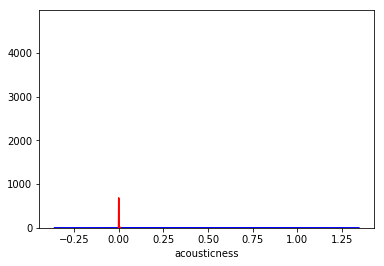

In [43]:
sns.distplot(good_df["acousticness"], color = 'b') 
sns.distplot(bad_df["acousticness"], color = 'r')

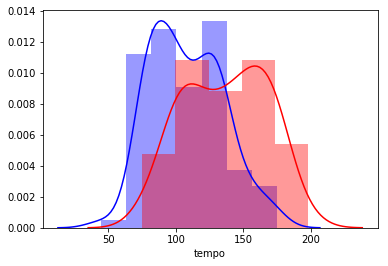

In [44]:
sns.distplot(good_df["tempo"], color = 'b') #tempo is 80-160 ish, peaks at 130
sns.distplot(bad_df["tempo"], color = 'r') #tempo is around 75-150 ish; slightly lower than good playlist, peaks at 100

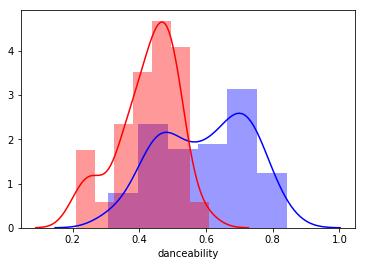

In [45]:
sns.distplot(good_df["danceability"], color = 'b') # danceability peaks around .5
sns.distplot(bad_df["danceability"], color = 'r') # danceability peaks around .58, slightly higher than good playlist's

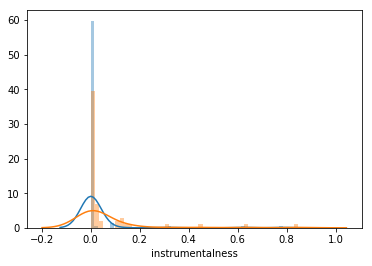

In [46]:
sns.distplot(good_df["instrumentalness"])
sns.distplot(bad_df["instrumentalness"])

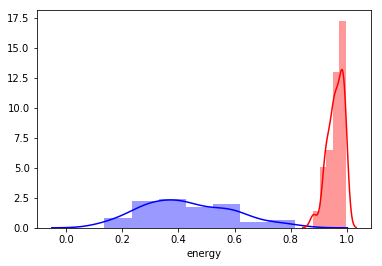

In [47]:
sns.distplot(good_df["energy"], color = 'b') 
sns.distplot(bad_df["energy"], color = 'r')

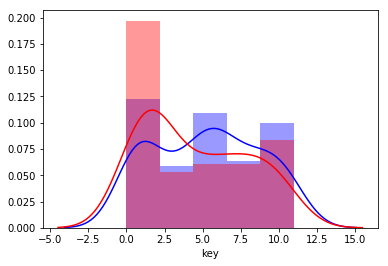

In [48]:
sns.distplot(good_df["key"], color = 'b') 
sns.distplot(bad_df["key"], color  = 'r')

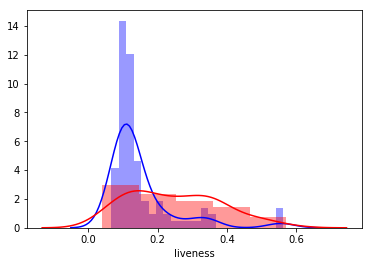

In [49]:
sns.distplot(good_df["liveness"], color = 'b') 
sns.distplot(bad_df["liveness"], color = 'r')

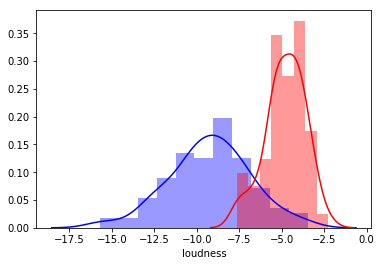

In [50]:
sns.distplot(good_df["loudness"], color = 'b') 
sns.distplot(bad_df["loudness"], color = 'r')

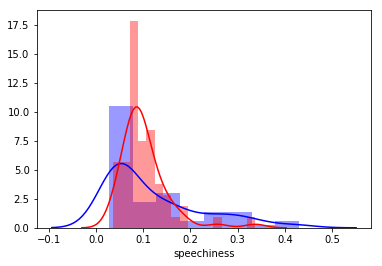

In [51]:
sns.distplot(good_df["speechiness"], color = "b") 
sns.distplot(bad_df["speechiness"], color = "r")

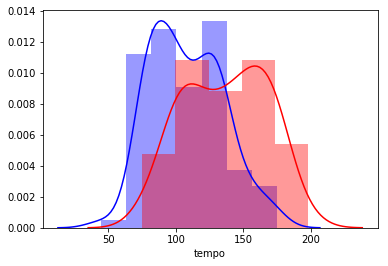

In [52]:
sns.distplot(good_df["tempo"], color = "b") 
sns.distplot(bad_df["tempo"], color = "r")

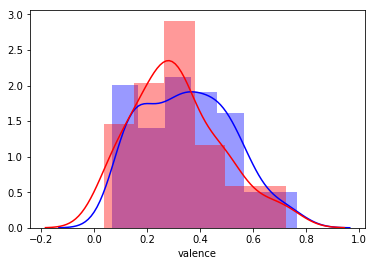

In [53]:
sns.distplot(good_df["valence"], color = "b") 
sns.distplot(bad_df["valence"], color = "r")

In [54]:
frames = [good_df, bad_df]

In [55]:
training_data = pd.concat(frames)

In [56]:
from sklearn.model_selection import train_test_split
features = ["danceability", "speechiness", "energy", "loudness", "instrumentalness", "acousticness"]
train, test = train_test_split(training_data, test_size = .2)

train_x = train[features]
train_y = train["like"]
test_x = test[features]
test_y = test["like"]

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(train_x, train_y)
y_pred = knn.predict(test_x)
knn.score(test_x, test_y)

0.9375

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
y_pred = dtc.predict(test_x)
dtc.score(test_x, test_y)

1.0

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
y_pred = rfc.predict(test_x)
rfc.score(test_x, test_y)

c:\users\tchun\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_x, train_y)
y_pred = lr.predict(test_x)
lr.score(test_x, test_y)

c:\users\tchun\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9375

In [69]:
#use user id and playlist id for function and get the features, call predict in our func
#pulls songs from that playlist, get the ones that return 1

#paramters: playlist users id, playlist id, own id (so spotify can create that playlsit for your account)
#

def make_recs(user_id, playlist_user, playlist_id):
    recommendations = sp.user_playlist_create(user_id, "recommendations")
    recommendations_id = recommendations['id']
    print(recommendations_id)
    
    temp = sp.user_playlist(playlist_user, playlist_id)["tracks"]["items"]
    
    names = []
    features= []
    ids = []
    
    for i in temp:
        ids.append(i["track"]["id"])
        names.append(i["track"]["name"])
    
    for i in sp.audio_features(ids):
        features.append(i)
    print(len(names))
        
    playlist_df = pd.DataFrame(features, index= names)
    playlist_df = playlist_df.drop(columns=["analysis_url", "track_href", "type","uri", "duration_ms"])
    
    features = ["danceability", "speechiness", "energy", "loudness", "instrumentalness", "acousticness"]
    predict = rfc.predict(playlist_df[features])
    playlist_df["like"] = predict
    
    final_recs = playlist_df[playlist_df["like"] == 1]
    final_ids = final_recs['id'].tolist()
    
    sp.user_playlist_add_tracks(user_id, recommendations_id, final_ids, None )
    #print(final_recs)

make_recs('tiff_chung', 'nxuzwr3ncg3ks6f1iy1grrrvc', '356RdloI1Y4ozLdUTh0FAU')

7osMcQED2KtnBhB3lwjZww
98
